In [14]:
import pandas as pd

# Load the dataset
df = pd.read_excel('Financial Analytics data.xlsx')

# Display the first few rows of the dataset
print(df.head())

   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN


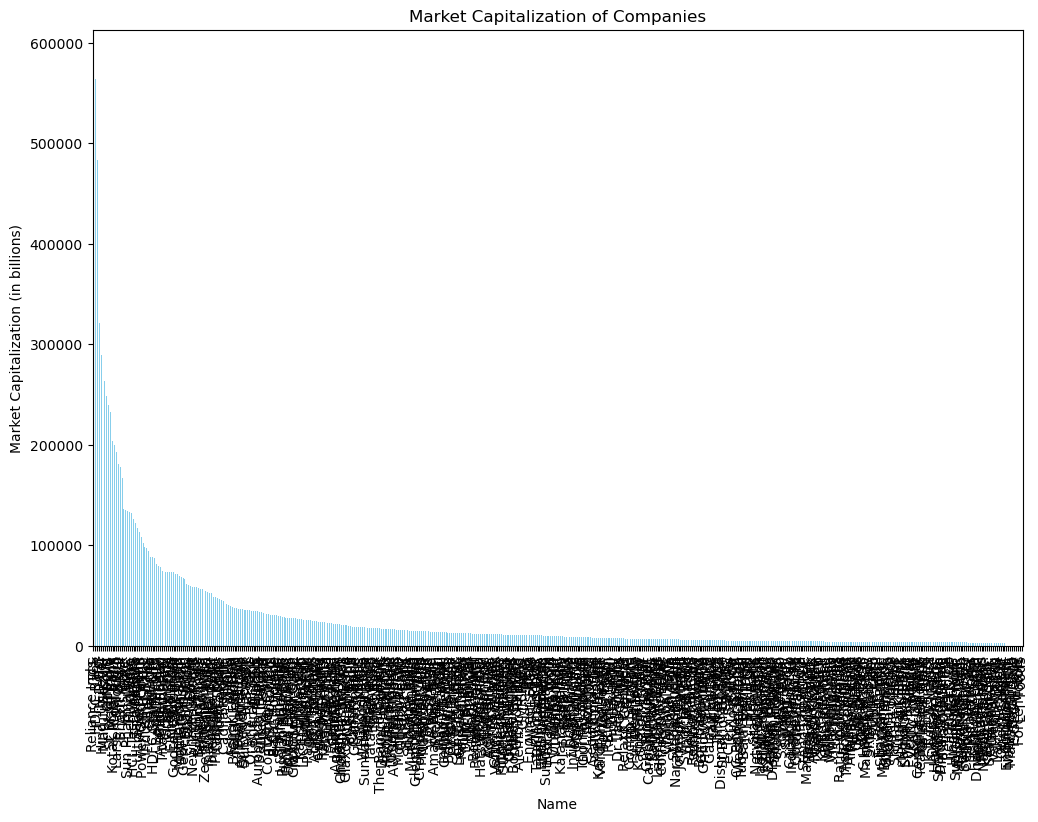

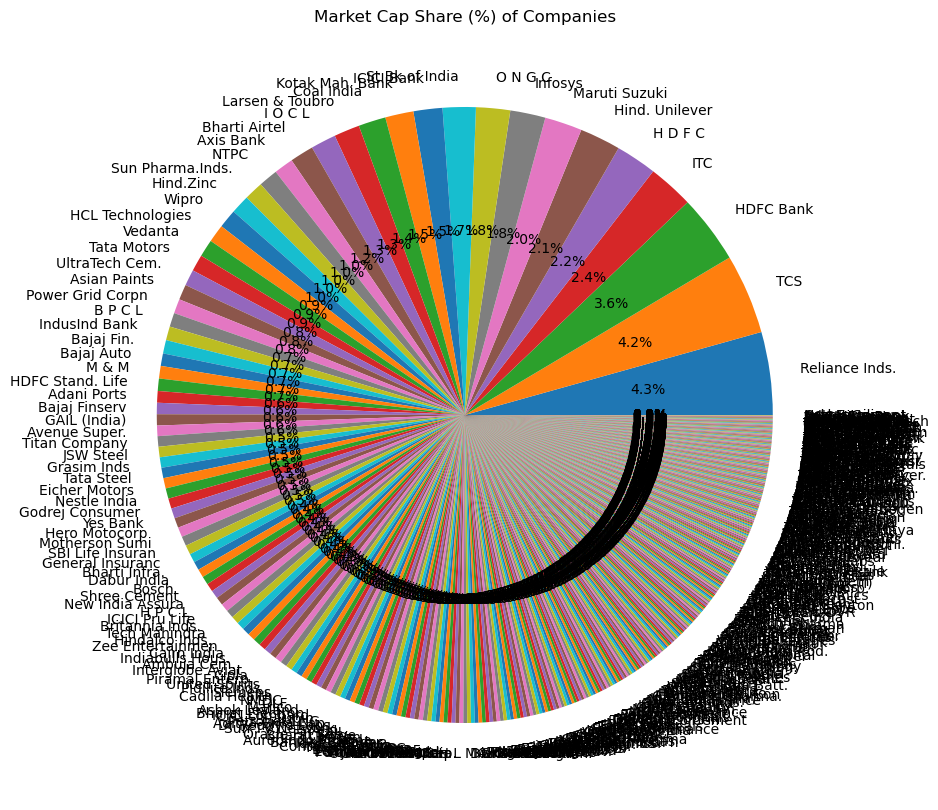

In [4]:
## Case 1: Market Capitalization Analysis
# Ranking companies by their market capitalization
df['Market Cap Rank'] = df['Mar Cap - Crore'].rank(ascending=False)

# Sorting the data by market capitalization rank
df_sorted = df.sort_values(by='Market Cap Rank')

# Calculating the percentage of total market capitalization each company holds
total_market_cap = df['Mar Cap - Crore'].sum()
df_sorted['Market Cap Share (%)'] = (df_sorted['Mar Cap - Crore'] / total_market_cap) * 100

# Visualizing the distribution of market capitalization using bar charts
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
df_sorted.set_index('Name')['Mar Cap - Crore'].plot(kind='bar', color='skyblue')
plt.title('Market Capitalization of Companies')
plt.ylabel('Market Capitalization (in billions)')
plt.show()

# Visualizing the market cap share using a pie chart
plt.figure(figsize=(10, 10))
df_sorted.set_index('Name')['Market Cap Share (%)'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Market Cap Share (%) of Companies')
plt.ylabel('')
plt.show()


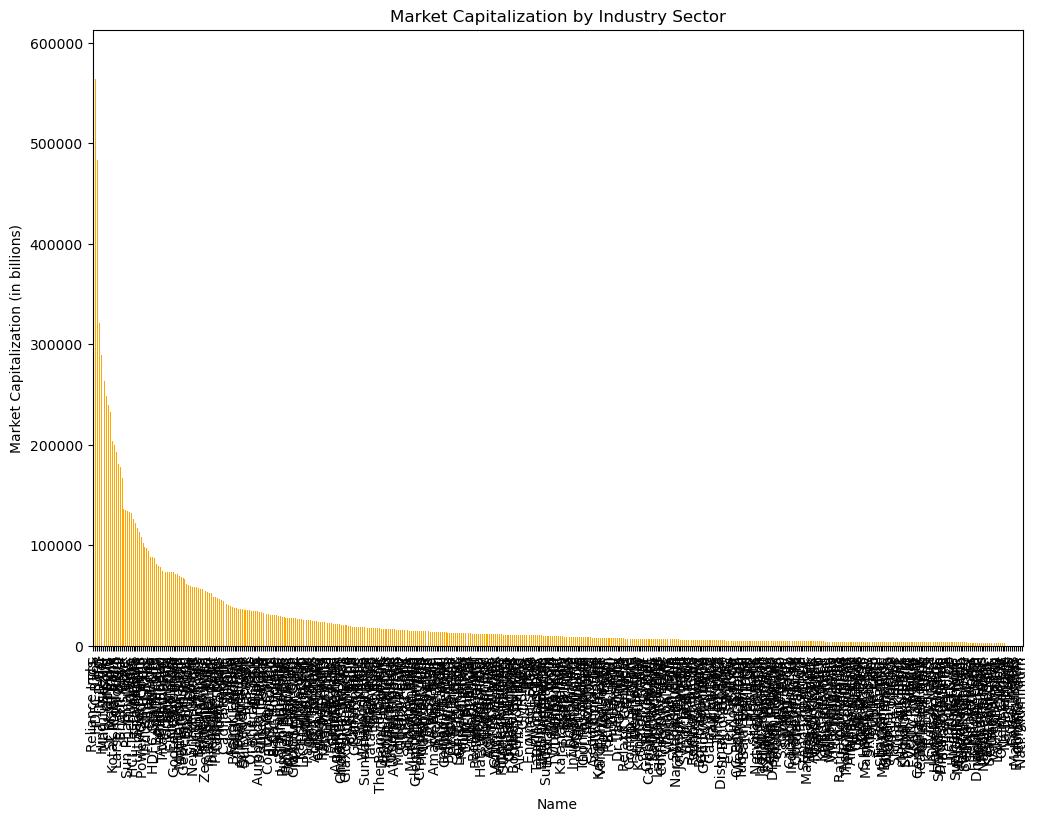

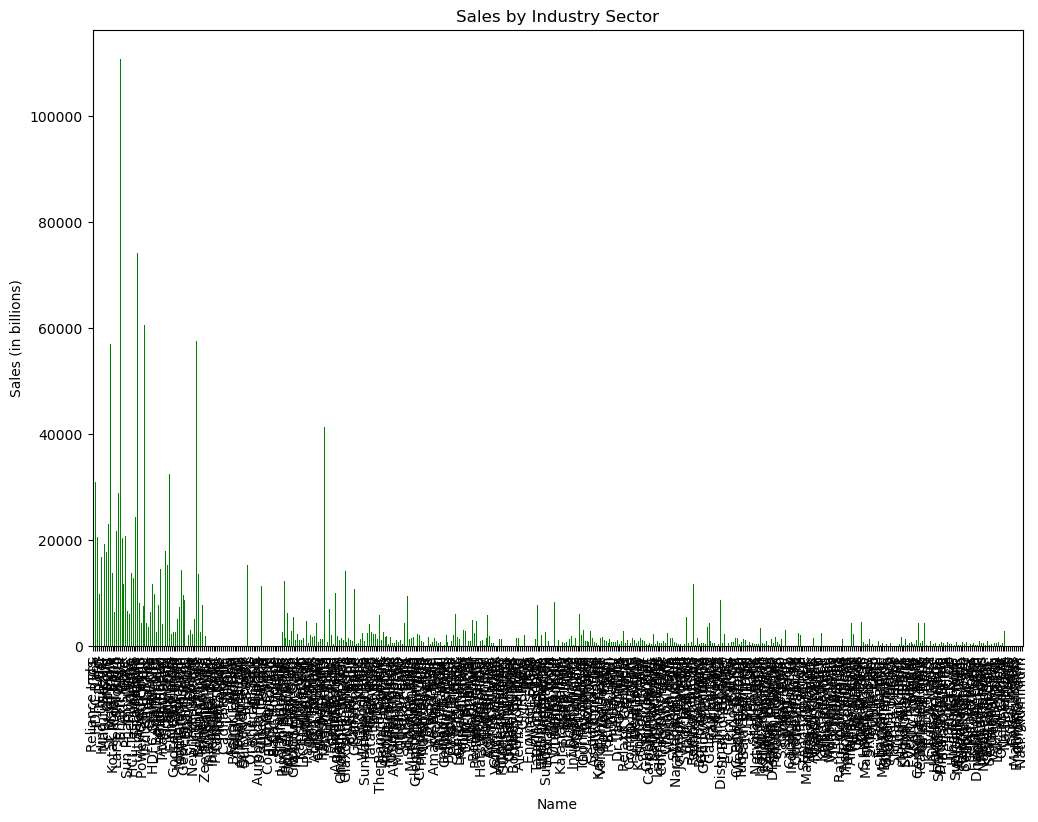

In [7]:
## Case 2: Industry Sector Analysis
# Grouping companies by industry sector
sector_group = df.groupby('Name').agg({
    'Mar Cap - Crore': 'sum',
    'Sales Qtr - Crore': 'sum'
}).reset_index()

# Identifying the most dominant sectors in terms of market capitalization and sales
sector_group = sector_group.sort_values(by='Mar Cap - Crore', ascending=False)

# Visualizing using bar charts
plt.figure(figsize=(12, 8))
sector_group.set_index('Name')['Mar Cap - Crore'].plot(kind='bar', color='orange')
plt.title('Market Capitalization by Industry Sector')
plt.ylabel('Market Capitalization (in billions)')
plt.show()

plt.figure(figsize=(12, 8))
sector_group.set_index('Name')['Sales Qtr - Crore'].plot(kind='bar', color='green')
plt.title('Sales by Industry Sector')
plt.ylabel('Sales (in billions)')
plt.show()

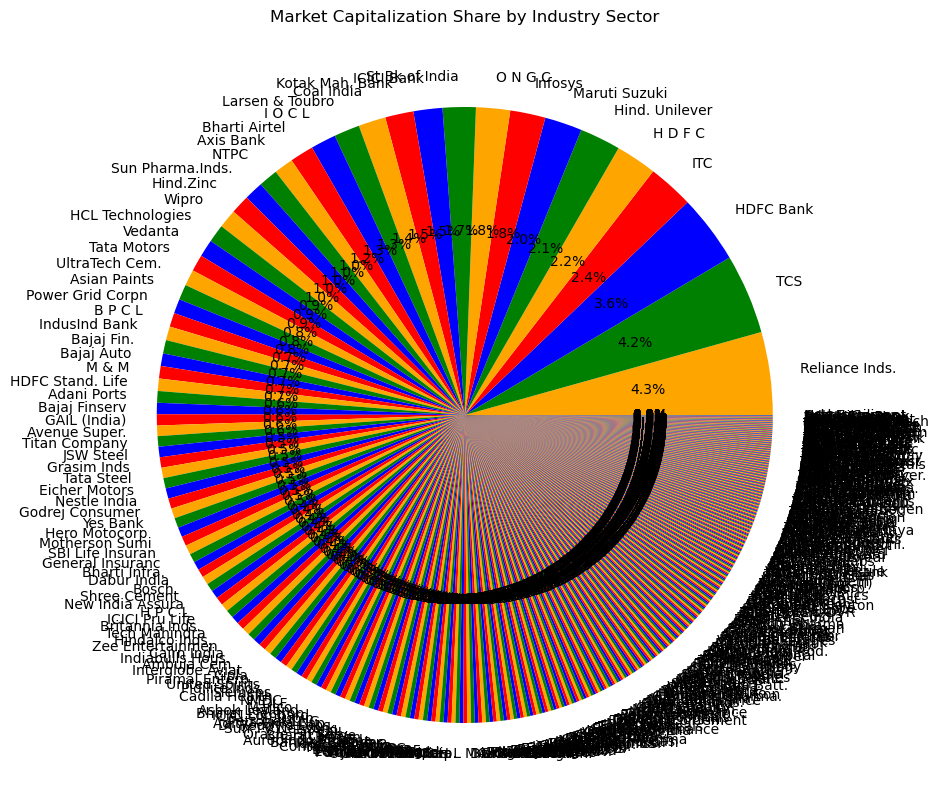

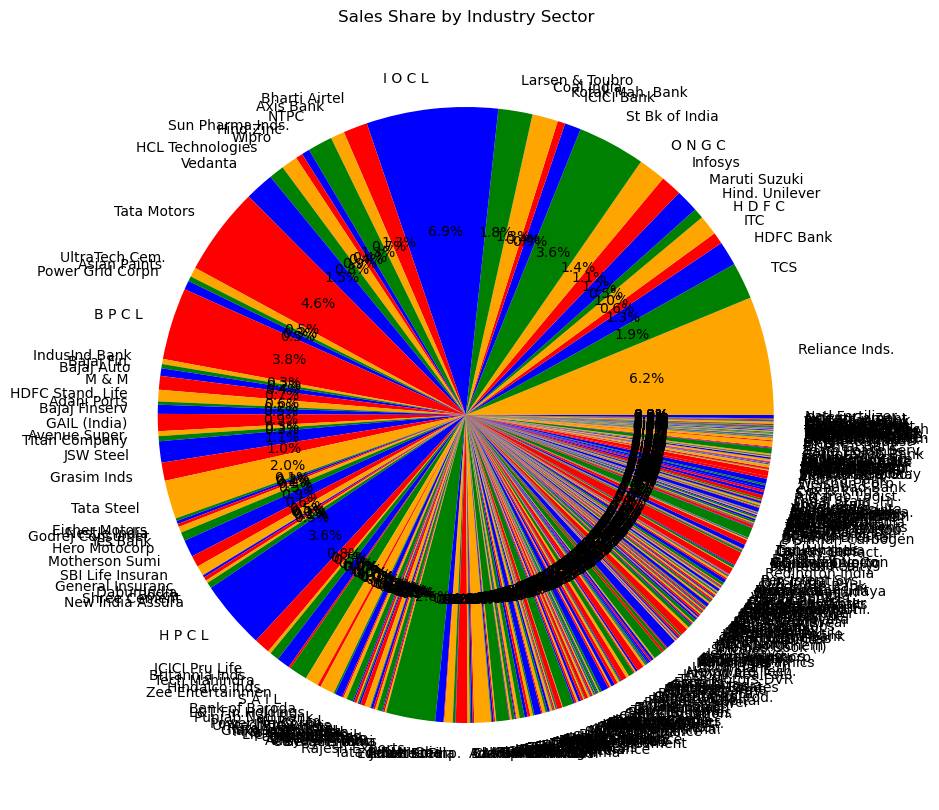

In [10]:
# Visualizing the market cap and sales distribution using pie charts
plt.figure(figsize=(10, 10))
sector_group.set_index('Name')['Mar Cap - Crore'].plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'green', 'blue', 'red'])
plt.title('Market Capitalization Share by Industry Sector')
plt.ylabel('')
plt.show()

plt.figure(figsize=(10, 10))
sector_group.set_index('Name')['Sales Qtr - Crore'].plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'green', 'blue', 'red'])
plt.title('Sales Share by Industry Sector')
plt.ylabel('')
plt.show()

             Name  Mar Cap - Crore  Sales Qtr - Crore
0  Reliance Inds.        583436.72           99810.00
1             TCS        563709.84           30904.00
2       HDFC Bank        482953.59           20581.27
3             ITC        320985.27            9772.02
4         H D F C        289497.37           16840.51
5  Hind. Unilever        288265.26            8590.00
6   Maruti Suzuki        263493.81           19283.20
7         Infosys        248320.35           17794.00
8         O N G C        239981.50           22995.88
9  St Bk of India        232763.33           57014.08


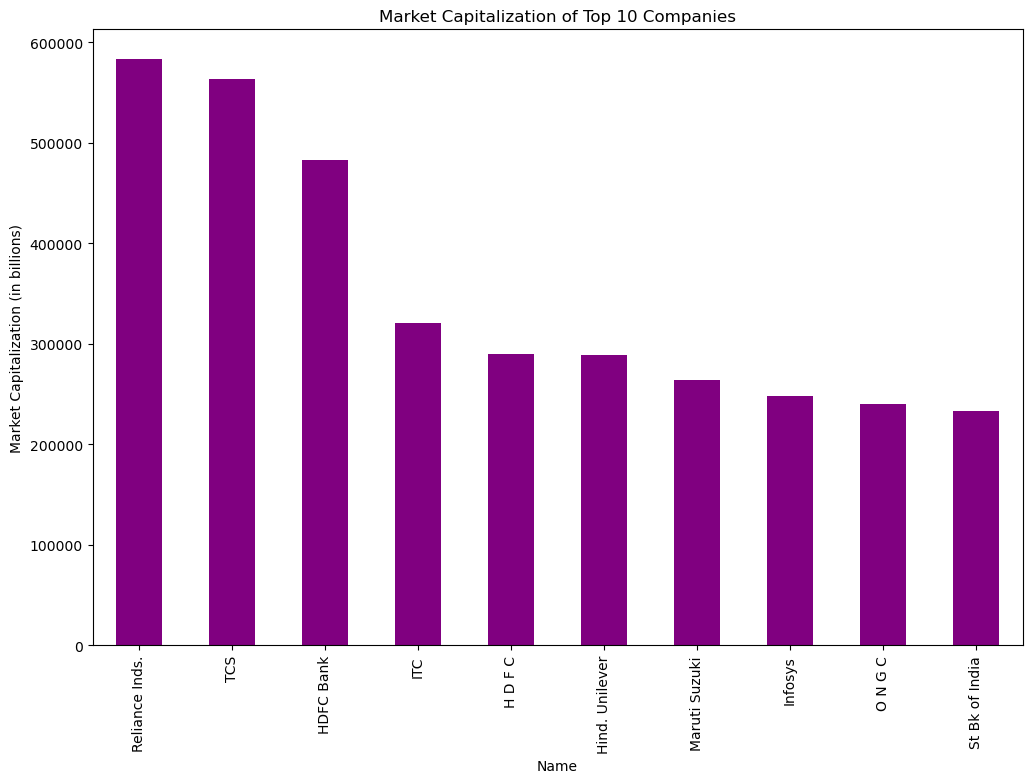

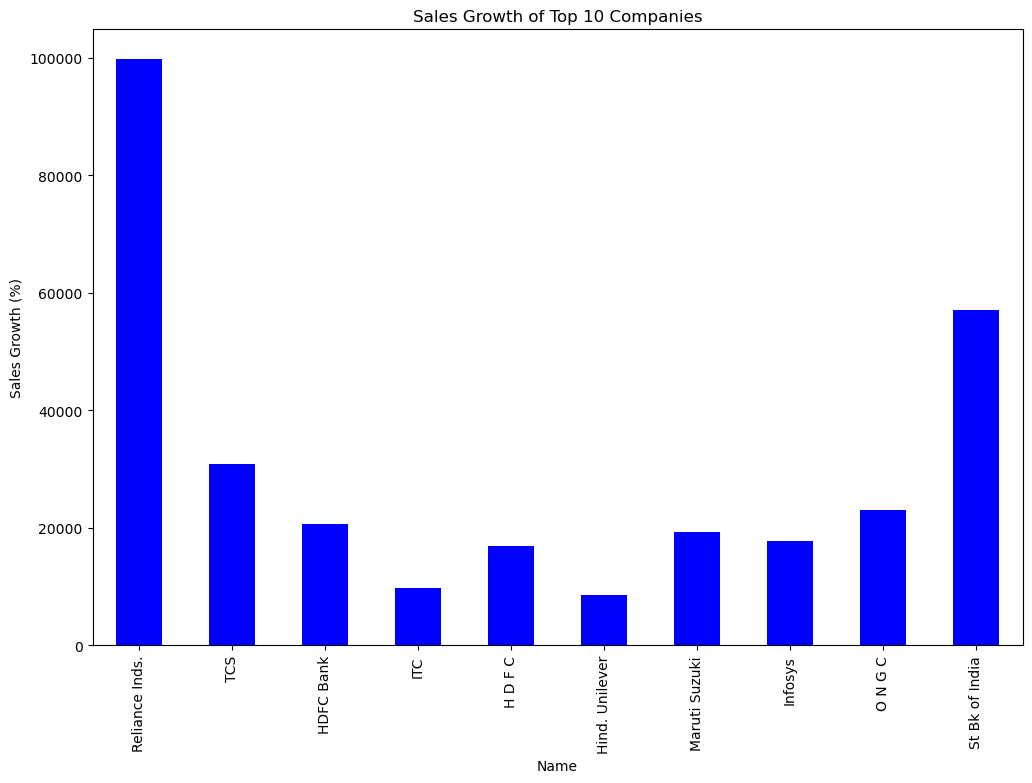

In [13]:
## Case 3: Top 10 Companies Analysis
# Extract data for the top 10 companies by market capitalization
top_10_companies = df_sorted.head(10)

# Compare their market capitalization, sales growth, and other key financial metrics
print(top_10_companies[['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore']])

# Visualize using bar charts
plt.figure(figsize=(12, 8))
top_10_companies.set_index('Name')['Mar Cap - Crore'].plot(kind='bar', color='purple')
plt.title('Market Capitalization of Top 10 Companies')
plt.ylabel('Market Capitalization (in billions)')
plt.show()

# Sales Growth of Top 10 Companies
plt.figure(figsize=(12, 8))
top_10_companies.set_index('Name')['Sales Qtr - Crore'].plot(kind='bar', color='blue')
plt.title('Sales Growth of Top 10 Companies')
plt.ylabel('Sales Growth (%)')
plt.show()

# Detailed profiles can be further analyzed by creating individual visualizations or tables for each company.


                Name  Mar Cap - Crore  Sales Qtr - Crore  Estimated Net Profit
0     Reliance Inds.        583436.72           99810.00             683246.72
1                TCS        563709.84           30904.00             594613.84
2          HDFC Bank        482953.59           20581.27             503534.86
3                ITC        320985.27            9772.02             330757.29
4            H D F C        289497.37           16840.51             306337.88
..               ...              ...                ...                   ...
483  Lak. Vilas Bank          3029.57             790.17               3819.74
484            NOCIL          3026.26             249.27               3275.53
485    Orient Cement          3024.32             511.53               3535.85
486  Natl.Fertilizer          3017.07            2840.75               5857.82
487        L T Foods              NaN                NaN                   NaN

[488 rows x 4 columns]


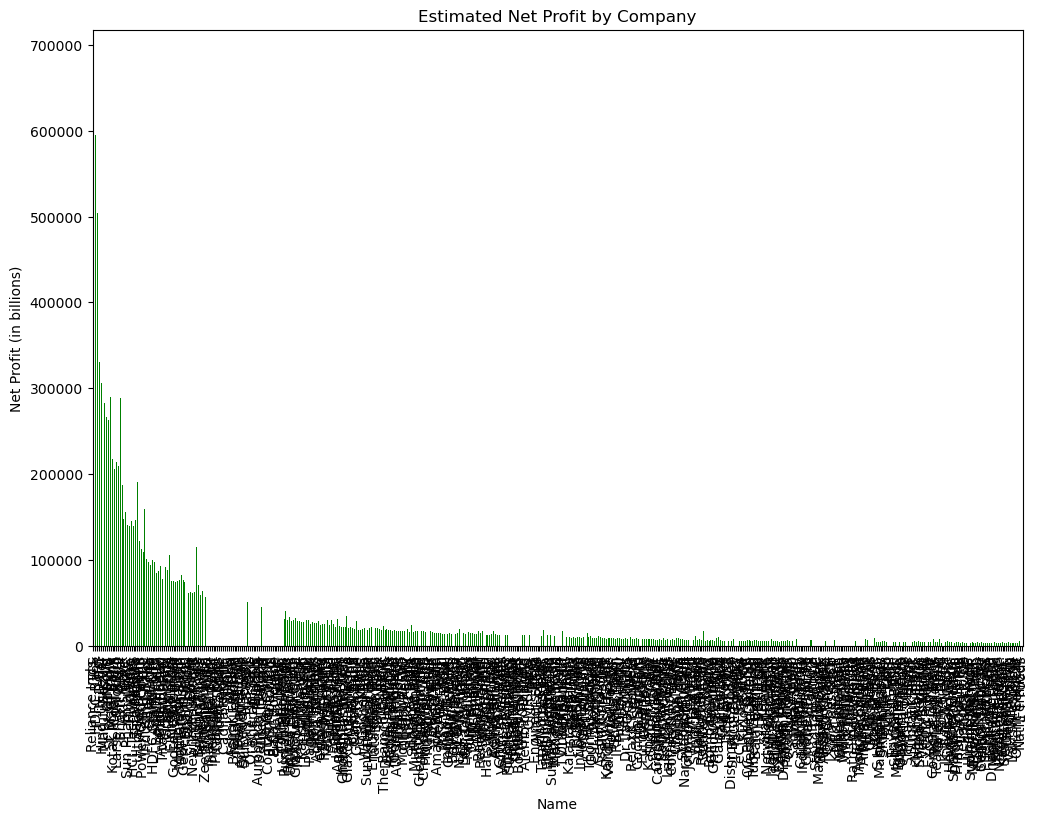

In [12]:
## Case 4: Sales Growth Analysis
# Assuming a typical Price to Earnings ratio
pe_ratio = 15  # This can be adjusted based on industry standards

# Calculate Net Profit using the assumed P/E ratio
df['Estimated Net Profit'] = df['Mar Cap - Crore'] / pe_ratio

# Display the resulting dataframe with the calculated Net Profit
print(df[['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Estimated Net Profit']])

# Optional: Visualizing the net profit
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
df.set_index('Name')['Estimated Net Profit'].plot(kind='bar', color='green')
plt.title('Estimated Net Profit by Company')
plt.ylabel('Net Profit (in billions)')
plt.show()


In [2]:
# Display the column names and basic information
print(df.columns)
print(df.info())

   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN
Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1